# Predicting Bike Rentals Using Random Forests

In this project, I will try to predict the total number of bikes people rented in a given hour. The data was collected by Washington, D.C. and compiled by Hadi Fanaee-T at the University of Porto. The data can be downloaded [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
bike_rentals=pd.read_csv('bike_rental_hour.csv')

In [3]:
print(bike_rentals.head())
print('\n')
print(bike_rentals.info())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 1

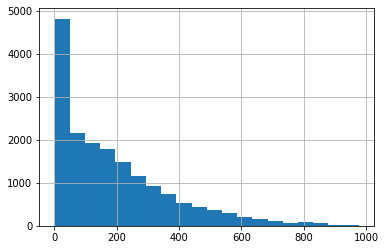

In [4]:
bike_rentals['cnt'].hist(bins=20)

In [5]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [6]:
# Adding a new column to bundle similar times together
def assign_label(x):
    if x in (6,12):
        return 1
    elif x in (12,18):
        return 2
    elif x in (18,24):
        return 3
    else:
        return 4
bike_rentals['time_label']=bike_rentals['hr'].apply(assign_label)

In [7]:
features=bike_rentals.columns.drop(['cnt','casual','dteday','registered'])
target='cnt'
X_train, X_test, y_train, y_test = train_test_split(bike_rentals[features], 
                    bike_rentals[target], test_size=0.2, random_state=1)

## Train/Test Split

In [8]:
# Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
linear_predictions=lr.predict(X_test)
linear_rmse=mean_squared_error(y_test,linear_predictions)**(1/2)
linear_rmse

140.77875541800069

In [9]:
# Decision Tree
dt=DecisionTreeRegressor(min_samples_leaf=5,max_depth=15)
dt.fit(X_train,y_train)
tree_predictions=dt.predict(X_test)
tree_rmse=mean_squared_error(y_test,tree_predictions)**(1/2)
tree_rmse

49.551597822508086

In [10]:
# Randome Forests 
rf=RandomForestRegressor(min_samples_leaf=2,max_depth=15)
rf.fit(X_train,y_train)
forest_predictions=rf.predict(X_test)
forest_rmse=mean_squared_error(y_test,forest_predictions)**(1/2)
forest_rmse

40.35537003535482

## Cross Validation

In [11]:
kf=KFold(n_splits=10,random_state=1,shuffle=True)

In [12]:
# Linear Model
linear_mses=cross_val_score(lr,bike_rentals[features],bike_rentals[target],scoring='neg_mean_squared_error',cv=kf)
avg_linear_rmse=np.mean(abs(linear_mses)**(1/2))
avg_linear_rmse

141.0879537757618

In [13]:
# Decision Tree
tree_mses=cross_val_score(dt,bike_rentals[features],bike_rentals[target],scoring='neg_mean_squared_error',cv=kf)
avg_tree_rmse=np.mean(abs(tree_mses)**(1/2))
avg_tree_rmse

50.58807056830226

In [14]:
# Random Forest
forest_mses=cross_val_score(rf,bike_rentals[features],bike_rentals[target],scoring='neg_mean_squared_error',cv=kf)
avg_forest_rmse=np.mean(abs(forest_mses)**(1/2))
avg_forest_rmse

41.28250795517205